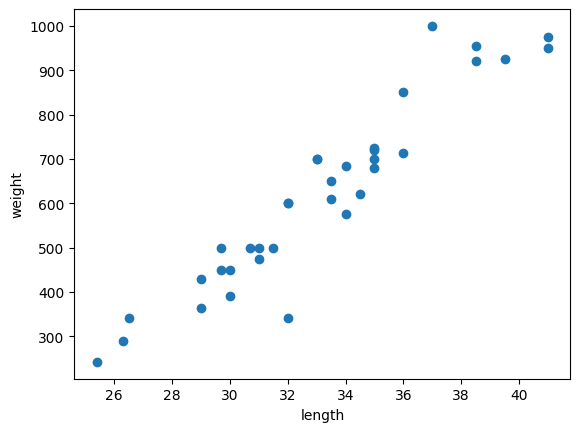

In [1]:
# 도미생선
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형회귀 - 직선의 방정식을 풀어서 예측
  
  weight = m*lenght + b

In [ ]:
# 기울기 m과 절편 b를 임의로 0으로 초기화 , 학습률도 설정
# 손실함수 예측값 실제값의 차이의 제곱의 평균인 MSE  계산

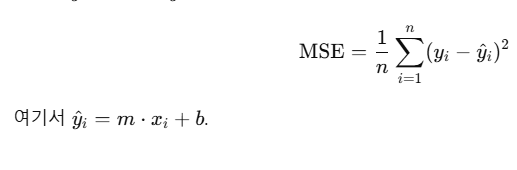


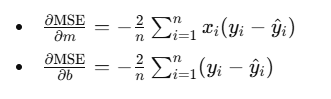

In [ ]:
# 스케일링 : 큰 데이터를 작게 - 데이터의 특성을 유지한채로


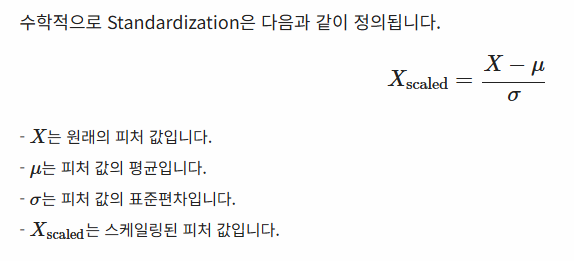

In [39]:
# 데이터 정규화
import numpy as np
bream_length_mean = np.mean(bream_length)
bream_length_std = np.std(bream_length)
bream_length_scaled = [(x-bream_length_mean)/bream_length_std for x in bream_length]

bream_weight_mean = np.mean(bream_weight)
bream_weight_std = np.std(bream_weight)
bream_weight_scaled = [(x-bream_weight_mean)/bream_weight_std for x in bream_weight]


In [40]:
m,b = 0.0 , 0.0  # 기울기와 절편
lr = 0.0001  # 학습률
epochs = 5000 # 반복횟수
n = len(bream_length)  # 데이터의 갯수

In [41]:
# 경사 하강법
from tqdm import tqdm
iteration = tqdm(range(epochs))
for epoch in iteration:
  y_pred = [ m*x+b  for x in bream_length_scaled  ] # 예측값
  error =  [y-y_hat  for y,y_hat in  zip(bream_weight_scaled,y_pred)] # 오차
  # 기울기 계산
  dm = -(2/n)*sum( x*e for x,e in zip(bream_length_scaled, error)  )
  db = -(2/n)*sum(error)
  # 업데이트
  m -= lr*dm
  b -= lr*db
  mse = sum( e**2 for e in error) / n
  iteration.set_description(f'mse : {mse:.2f}')

# 결과
print("")
print(f"최종 모델 : weight = {m:.4f}*length + {b:.4f}")


mse : 0.23: 100%|██████████| 5000/5000 [00:10<00:00, 485.71it/s]


최종 모델 : weight = 0.5982*length + 0.0000


In [43]:
# 길이가 37이면 무게는?
0.5982*37 + 0.0000

22.133399999999998

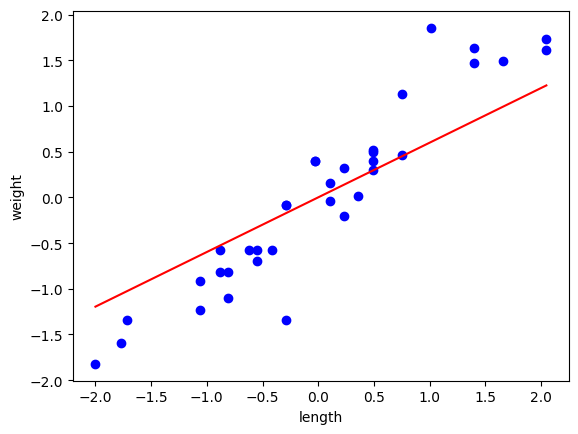

In [46]:
# 시각적으로 표현
import matplotlib.pyplot as plt
# 예측값
# bream_length 정렬
bream_length = sorted(bream_length)
predict_weight = [ m*x+b for x in  bream_length_scaled]

plt.scatter(bream_length_scaled,bream_weight_scaled,color='blue',label = 'Actual')
plt.plot(bream_length_scaled,predict_weight,color='red',label='Predict')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 110 120 130 140 150
# 1 2 3 4 5 6 7

In [63]:
# 경사 하강법
from tqdm import tqdm
def train(x_train,y_train,lr=0.0001,epochs=5000):
  iteration = tqdm(range(epochs))
  m,b = 0.0, 0.0
  for epoch in iteration:
    y_pred = [ m*x+b  for x in x_train  ] # 예측값
    error =  [y-y_hat  for y,y_hat in  zip(y_train,y_pred)] # 오차
    # 기울기 계산
    dm = -(2/n)*sum( x*e for x,e in zip(x_train, error)  )
    db = -(2/n)*sum(error)
    # 업데이트
    m -= lr*dm
    b -= lr*db
    mse = sum( e**2 for e in error) / n
    iteration.set_description(f'mse : {mse:.2f}')
  return m,b


In [64]:
m,b = train(bream_length, bream_weight)

mse : 19034.70: 100%|██████████| 5000/5000 [00:12<00:00, 413.11it/s]


In [67]:
m_scaled, b_scaled = train(bream_length_scaled, bream_weight_scaled,epochs=10000)

mse : 0.12: 100%|██████████| 10000/10000 [00:23<00:00, 421.25it/s]


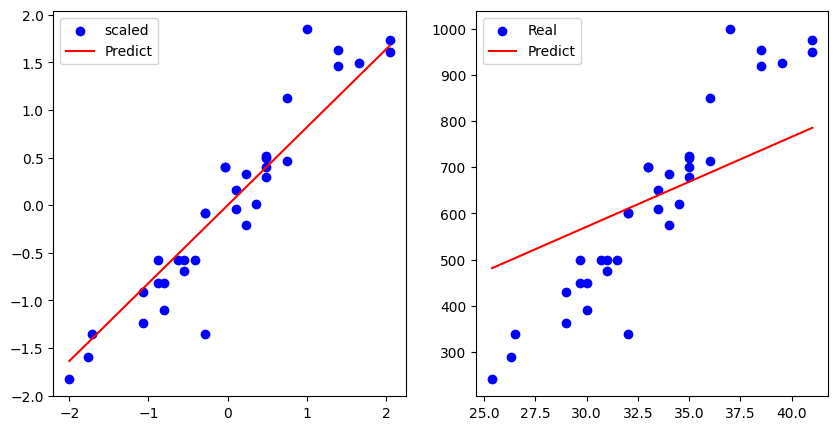

In [68]:
# 스케일링 인공지능에서 대단히 중요한 역활
# 데이터이 단위(범위)를 맞춰준다.--> 데이터 특성은 유지
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(bream_length_scaled,bream_weight_scaled,color='blue',label = 'scaled')
plt.plot(bream_length_scaled, m_scaled*np.array(bream_length_scaled)+b_scaled,color='red',label='Predict')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(bream_length,bream_weight,color='blue',label = 'Real')
plt.plot(bream_length, m*np.array(bream_length)+b,color='red',label='Predict')
plt.legend()
plt.show()

또 다른 문제

In [69]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

- 데이터의 분포가 어떤 모습인지 시각화를 통해 알아봅시다
- 스케일을 했을때 데이터의 특성이 살아있는지 확인
- standard Sacler (x - 평균) / 표준편차
- minmax : (x - 최소값) / (최대값 - 최소값)

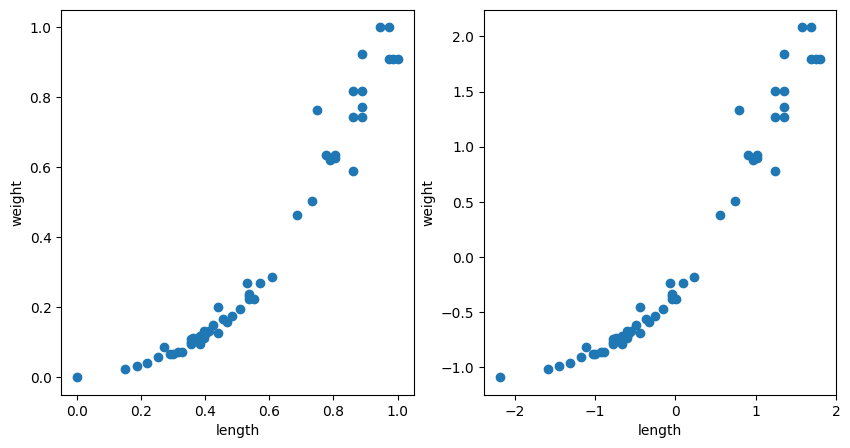

In [84]:
from re import S
# 평균과 표준편차
m = np.mean(perch_length)
s = np.std(perch_length)
perch_length_scaled = [(x-m)/s for x in perch_length]
m = np.mean(perch_weight)
s = np.std(perch_weight)
perch_weight_scaled = [(x-m)/s for x in perch_weight]

# 최대 최소
min = np.min(perch_length)
max = np.max(perch_length)
perch_length_minmax = [(x-min)/(max-min) for x in perch_length]

min = np.min(perch_weight)
max = np.max(perch_weight)
perch_weight_minmax = [(x-min)/(max-min) for x in perch_weight]




plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(perch_length_minmax,perch_weight_minmax)
plt.xlabel('length')
plt.ylabel('weight')

plt.subplot(1,2,2)
plt.scatter(perch_length_scaled,perch_weight_scaled)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

학습하기 - train 함수 적용

In [93]:
m_minmax,b_minmax = train(perch_length_minmax,perch_weight_minmax, lr =0.01 ,epochs=1000)

mse : 0.02: 100%|██████████| 1000/1000 [00:01<00:00, 535.86it/s]


In [94]:
m_scaled,b_scaled = train(perch_length_scaled,perch_weight_scaled,lr =0.01, epochs=1000)

mse : 0.13: 100%|██████████| 1000/1000 [00:03<00:00, 280.85it/s]


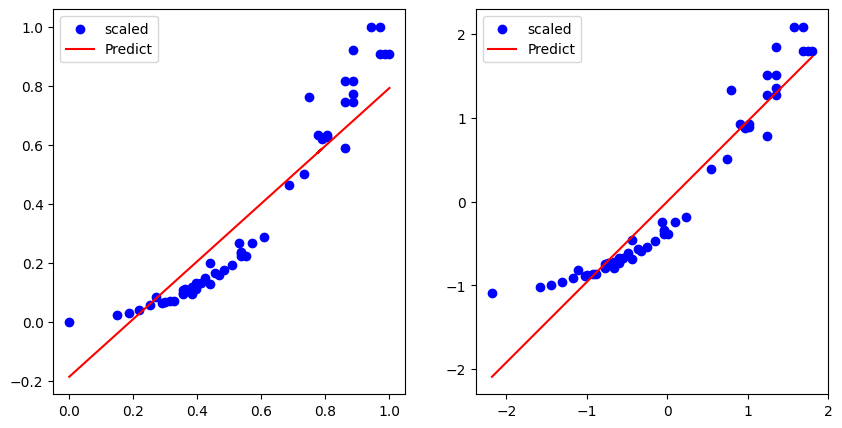

In [95]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(perch_length_minmax,perch_weight_minmax,color='blue',label = 'scaled')
plt.plot(perch_length_minmax, m_minmax*np.array(perch_length_minmax)+b_minmax,color='red',label='Predict')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(perch_length_scaled,perch_weight_scaled,color='blue',label = 'scaled')
plt.plot(perch_length_scaled, m_scaled*np.array(perch_length_scaled)+b_scaled,color='red',label='Predict')
plt.legend()



plt.show()

비선형 문제로 접근

In [96]:
np.column_stack(([[1,2,3],[4,5,6]]))

array([[1, 4],
       [2, 5],
       [3, 6]])

비선형 문제로 접근하려면 다항(poly)으로 만들어야한다.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit()

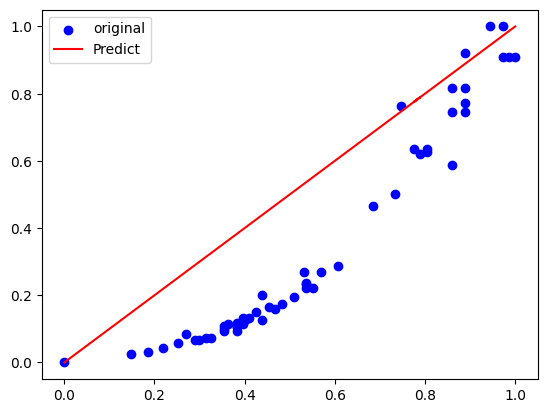

In [103]:
perch_length_minmax = np.array(perch_length_minmax)
perch_length_minmax_poly = np.column_stack((perch_length_minmax**2,perch_length_minmax))
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(perch_length_minmax_poly,perch_length_minmax)

plt.scatter(perch_length_minmax,perch_weight_minmax,color='blue',label = 'original')
plt.plot(perch_length_minmax, lr.predict(perch_length_minmax_poly),color='red',label='Predict')
plt.legend()
plt.show()


In [105]:
lr.predict(perch_length_minmax_poly)

array([2.22044605e-16, 1.48876404e-01, 1.85393258e-01, 2.19101124e-01,
       2.52808989e-01, 2.69662921e-01, 2.89325843e-01, 2.97752809e-01,
       3.14606742e-01, 3.25842697e-01, 3.53932584e-01, 3.53932584e-01,
       3.53932584e-01, 3.62359551e-01, 3.82022472e-01, 3.82022472e-01,
       3.82022472e-01, 3.82022472e-01, 3.82022472e-01, 3.96067416e-01,
       3.96067416e-01, 4.01685393e-01, 4.10112360e-01, 4.24157303e-01,
       4.38202247e-01, 4.38202247e-01, 4.55056180e-01, 4.66292135e-01,
       4.83146067e-01, 5.08426966e-01, 5.30898876e-01, 5.36516854e-01,
       5.36516854e-01, 5.36516854e-01, 5.50561798e-01, 5.70224719e-01,
       6.06741573e-01, 6.85393258e-01, 7.33146067e-01, 7.47191011e-01,
       7.89325843e-01, 7.75280899e-01, 8.03370787e-01, 8.03370787e-01,
       8.59550562e-01, 8.59550562e-01, 8.59550562e-01, 8.87640449e-01,
       8.87640449e-01, 8.87640449e-01, 8.87640449e-01, 9.43820225e-01,
       9.71910112e-01, 9.71910112e-01, 9.85955056e-01, 1.00000000e+00])